In [ ]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import gradient_descent_v2
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
# Загружаем данные
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
# Размер мини-выборки
batch_size = 90
# Количество классов изображений
nb_classes = 10
# Количество эпох для обучения
nb_epoch = 35
# Размер изображений
img_rows, img_cols = 32, 32
# Количество каналов в изображении: RGB
img_channels = 3

In [ ]:
classes = ['аэроплан', 'автомобиль', 'птица', 'кошка', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

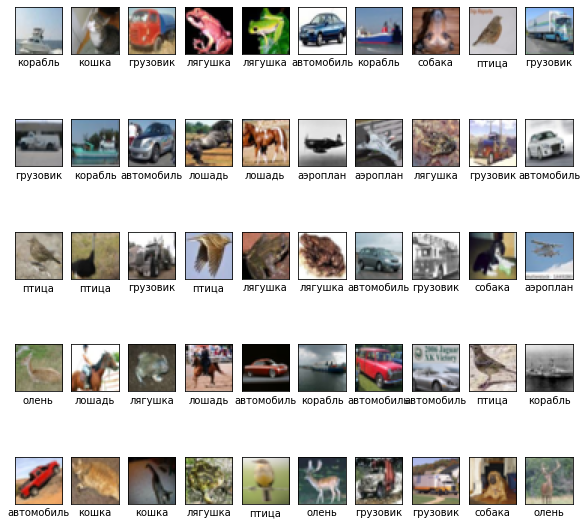

In [ ]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i][0]])

In [ ]:
# Нормализуем данные
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
# Преобразуем метки в категории
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [ ]:
# Создаем последовательную модель
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(nb_classes, activation='softmax'))

In [ ]:
# Задаем параметры оптимизации
sgd = gradient_descent_v2.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

In [ ]:
# Обучаем модель
history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              shuffle=True,
              verbose=1)

Epoch 1/35
500/500 [==============================] - 14s 10ms/step - loss: 1.9571 - accuracy: 0.2803 - val_loss: 1.5882 - val_accuracy: 0.4164
Epoch 2/35
500/500 [==============================] - 5s 10ms/step - loss: 1.5071 - accuracy: 0.4504 - val_loss: 1.2672 - val_accuracy: 0.5468
Epoch 3/35
500/500 [==============================] - 5s 9ms/step - loss: 1.2909 - accuracy: 0.5319 - val_loss: 1.1008 - val_accuracy: 0.6046
Epoch 4/35
500/500 [==============================] - 5s 9ms/step - loss: 1.1393 - accuracy: 0.5904 - val_loss: 0.9823 - val_accuracy: 0.6586
Epoch 5/35
500/500 [==============================] - 5s 9ms/step - loss: 1.0303 - accuracy: 0.6339 - val_loss: 0.8861 - val_accuracy: 0.6992
Epoch 6/35
500/500 [==============================] - 5s 9ms/step - loss: 0.9553 - accuracy: 0.6590 - val_loss: 0.8466 - val_accuracy: 0.7030
Epoch 7/35
500/500 [==============================] - 5s 9ms/step - loss: 0.8803 - accuracy: 0.6873 - val_loss: 0.7582 - val_accuracy: 0.7364
Epo

In [ ]:
# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 79.93%


In [ ]:
# Выберем изображение для проверки
n_rec = 50

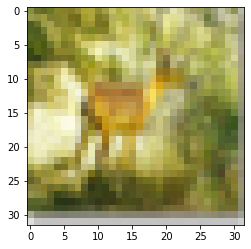

In [ ]:
plt.imshow(X_test[n_rec], cmap=plt.cm.binary)
plt.show()

In [ ]:
# Меняем размерность изображения и нормализуем его
x = X_test[n_rec]
x = numpy.expand_dims(x, axis=0)

In [ ]:
# Запускаем распознавание
prediction = model.predict(x)

1/1 [==============================] - 0s 169ms/step


In [ ]:
# Печатаем результаты распознавания
prediction

array([[1.7179274e-05, 1.2670531e-06, 1.4117459e-02, 8.5847528e-04,
        9.7055650e-01, 9.3163061e-04, 1.2970882e-02, 5.1848573e-04,
        9.4548483e-07, 2.7133607e-05]], dtype=float32)

In [ ]:
# Преобразуем результаты из формата one hot encoding
prediction = numpy.argmax(prediction[0])
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])


Номер класса: 4
Название класса: олень
